In [10]:
%load_ext autoreload
%autoreload 2

from image_utils import preprocess_from_file, preprocess_from_url
from model import ImageModel
from PIL import Image
from io import BytesIO
import requests

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# modelの読み込み
model = ImageModel('sample_model')

## ローカルの画像を使用して予測を行う場合

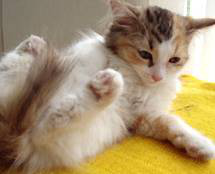

In [5]:
# labelを予測する画像の確認
Image.open('sample_image/cat/cat.105.jpg')

In [16]:
%%time
# 画像をmodelへの入力データに変換
image = preprocess_from_file('sample_image/cat/cat.105.jpg')
# 予測実行
model.predict(image)

CPU times: user 149 ms, sys: 10.8 ms, total: 160 ms
Wall time: 60.3 ms


'cat'

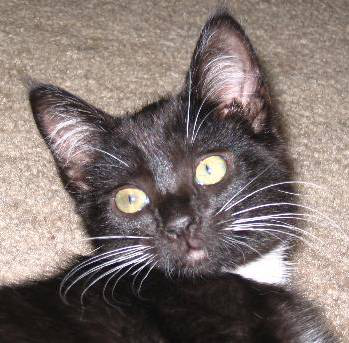

In [9]:
# labelを予測する画像の確認
Image.open('sample_image/cat/cat.102.jpg')

In [15]:
%%time
# 画像をmodelへの入力データに変換
image = preprocess_from_file('sample_image/cat/cat.102.jpg')
# 予測実行
model.predict(image)

CPU times: user 330 ms, sys: 27.8 ms, total: 358 ms
Wall time: 120 ms


'cat'

## WEB上の画像を使用して予測を行う場合

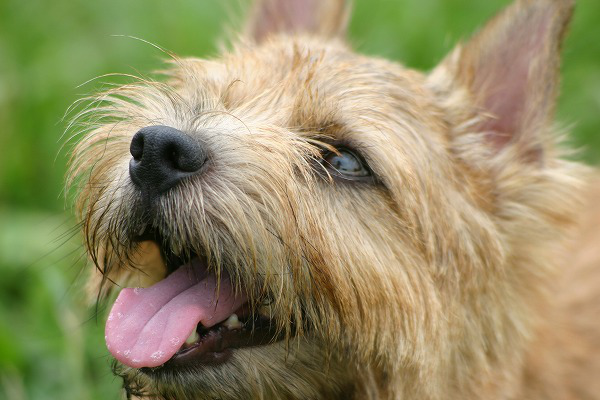

In [5]:
image = BytesIO(requests.get('https://pro-foto.jp/free/img/images_big/dog0149-041.jpg').content)
Image.open(image)

In [17]:
%%time
# 画像をmodelへの入力データに変換
image = preprocess_from_url('https://pro-foto.jp/free/img/images_big/dog0149-041.jpg')
model.predict(image)

CPU times: user 590 ms, sys: 43.7 ms, total: 634 ms
Wall time: 680 ms


'dog'

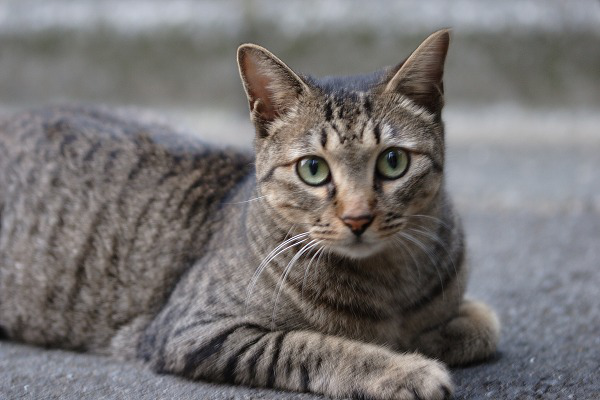

In [20]:
image = BytesIO(requests.get('https://pro-foto.jp/free/img/images_big/cat0006-001.jpg').content)
Image.open(image)

In [18]:
%%time
# 画像をmodelへの入力データに変換
image = preprocess_from_url('https://pro-foto.jp/free/img/images_big/cat0006-001.jpg')
model.predict(image)

CPU times: user 574 ms, sys: 44.2 ms, total: 618 ms
Wall time: 463 ms


'cat'